### Homework 7 — *College Student Success Analytics*
**Topics:** Pandas, NumPy, Matplotlib  

**Goal:**  For this homework, I want you to practices with pandas, numpy, and matplotlib but I want you also to practice figuring out what the data is telling us!  So, story-telling is a learning goal:)  

Two synthetic datasets describe **250 fictional Rhodes students**. 

| File | Rows | Description |
|------|------|-------------|
| `student_academic.csv` | 250 | One row per student: GPA, credits, study hours, attendance, etc. |
| `student_activities.csv` | 0–650 | One row per *activity* a student joins (0–3 per student) with hours/week & leadership flag |

---
## Task
The Dean of Students wants to know which factors predict academic success and whether co‑curricular involvement helps or hurts. Produce a short analytics report (and this reproducible notebook) that answers her questions.

---
## Part A — Data Wrangling *(15 pts)*
1. **Load & inspect** both CSVs (done above). Show shape and `dtypes`.
2. **Handle missing values** (~5 % already inserted). Choose a strategy to fix it **and justify it in the comments**.
3. **Add Three Columns** (GPA_change, StudyIntensity, AttendanceFlag) to the data frame calculated as follows:
```text
GPA_change          = GPA_Sem2 – GPA_Sem1
StudyIntensity = Hours_Study / Credits_Enrolled
AttendanceFlag = 1 if AttendanceRate ≥ 0.90 else 0
```


In [3]:
#PART A: Data Wrangling
import pandas as pd
df2 = pd.read_csv("student_activities.csv")
df = pd.read_csv("student_academic.csv")
print(df.shape)
print(df.dtypes)
print(df2.shape)
print(df2.dtypes)



(250, 9)
StudentID             int64
Major                object
ClassYear            object
GPA_Sem1            float64
GPA_Sem2            float64
Credits_Enrolled      int64
Hours_Study         float64
AttendanceRate      float64
Scholarship          object
dtype: object
(364, 4)
StudentID          int64
Activity          object
HoursPerWeek       int64
LeadershipRole    object
dtype: object


In [5]:
df['GPA_Sem1'].fillna(-1, inplace=True)
df['GPA_Sem2'].fillna(-1, inplace=True)
df['Hours_Study'].fillna(-1, inplace=True)
df['AttendanceRate'].fillna(-1, inplace=True)
print(df.head(20))
#-1 fills in a number so it won't cause any errors, but lets us know that everything that 
#is -1 is not real

    StudentID             Major  ClassYear  GPA_Sem1  GPA_Sem2  \
0        1001        Psychology   Freshman      3.86      3.68   
1        1002           English     Senior      3.01      3.29   
2        1003         Economics     Senior      3.23      3.23   
3        1004           English  Sophomore      2.96      2.85   
4        1005           English     Senior      2.93      2.92   
5        1006           Biology     Senior      3.09      2.72   
6        1007         Economics  Sophomore      3.09      2.33   
7        1008         Economics     Junior      2.96      3.04   
8        1009         Economics     Senior      2.98      3.08   
9        1010           English  Sophomore      3.64      4.00   
10       1011        Psychology   Freshman      4.00      3.83   
11       1012         Economics     Junior      3.00      3.42   
12       1013           English   Freshman     -1.00      4.00   
13       1014           Biology   Freshman      3.41      3.76   
14       1

C:\Users\memph\AppData\Local\Temp\ipykernel_2264\1562231243.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GPA_Sem1'].fillna(-1, inplace=True)
C:\Users\memph\AppData\Local\Temp\ipykernel_2264\1562231243.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [7]:
#GPA_change          = GPA_Sem2 – GPA_Sem1
#StudyIntensity = Hours_Study / Credits_Enrolled
#AttendanceFlag = 1 if AttendanceRate ≥ 0.90 else 0

df['GPA_change'] = df['GPA_Sem2'] - df['GPA_Sem1']
df['StudyIntensity'] = df['Hours_Study'] / df['Credits_Enrolled']
df['AttendanceFlag'] = (df['AttendanceRate']>= 0.9).astype(int)
print(df.head())

   StudentID       Major  ClassYear  GPA_Sem1  GPA_Sem2  Credits_Enrolled  \
0       1001  Psychology   Freshman      3.86      3.68                14   
1       1002     English     Senior      3.01      3.29                13   
2       1003   Economics     Senior      3.23      3.23                15   
3       1004     English  Sophomore      2.96      2.85                16   
4       1005     English     Senior      2.93      2.92                12   

   Hours_Study  AttendanceRate Scholarship  GPA_change  StudyIntensity  \
0         12.0            0.98          No       -0.18        0.857143   
1         24.0            0.76          No        0.28        1.846154   
2         33.0            0.89          No        0.00        2.200000   
3         14.0            0.93         Yes       -0.11        0.875000   
4         38.0            0.97         Yes       -0.01        3.166667   

   AttendanceFlag  
0               1  
1               0  
2               0  
3           

---
## Part B — Exploratory Analyses *(55 pts)*
The difficulty of this problem that the data is contained in two different data sets.  They are connected by StudentID.  You'll need to google this and figure out how to *merge* the data.   Make sure you do it correctly.

| # | Question | Pts |
|---|----------|-----|
| 1 | **GPA shift.** Distribution of `GPA_change`. Print out the top 10 improvers. | 8 |
| 2 | **Study habits.** Pearson correlation between `StudyIntensity` and `GPA_Sem2`; Visualize with scatter and print out the Pearson correlation (in our notes).    | 8 |
| 3 | **Scholarships.** Mean & SD of `GPA_Sem2` for scholarship vs non‑scholarship.  Visualize this with box plot. | 6 |
| 4 | **Attendance.** Compute the average `GPA_Sem2` for `AttendanceFlag` = 1 vs 0. Visualize this with a bar chart. | 6 |
| 5 | **Activity load.** Compute total `Activity_Hours`; plot vs `GPA_Sem2`. | 6 |
| 6 | **Leadership.** Does *any* leadership role correspond to higher GPA?  Plot this with box plot (include average and std for each leadership role).  You might have to groupby...| 7 |
| 7 | **Major comparison.** For every major: mean GPA, mean study hours, scholarship %. Print out  and Visualize with a grouped bar chart. | 8 |
| 8 | **Predictive index.** Calculate the (z‑score) GPA (looking back at our class notes), attendance, study hours; Call this variable `SuccessScore`; list top 15. | 6 |

In [9]:
#1
print(df.nlargest(10, "GPA_change"))

     StudentID             Major ClassYear  GPA_Sem1  GPA_Sem2  \
12        1013           English  Freshman      -1.0      4.00   
100       1101        Psychology    Senior      -1.0      3.86   
217       1218        Psychology    Senior      -1.0      3.66   
65        1066        Psychology  Freshman      -1.0      3.48   
102       1103        Psychology  Freshman      -1.0      3.23   
85        1086  Computer Science  Freshman      -1.0      3.22   
25        1026         Economics  Freshman      -1.0      3.18   
209       1210        Psychology    Senior      -1.0      3.10   
120       1121           Biology    Junior      -1.0      3.04   
168       1169  Computer Science    Junior      -1.0      2.65   

     Credits_Enrolled  Hours_Study  AttendanceRate Scholarship  GPA_change  \
12                 15         39.0            0.95         Yes        5.00   
100                12         36.0            0.79         Yes        4.86   
217                13         12.0     

-0.08121127668835867


Text(0.5, 1.0, 'Scatter plot of Study Intensity vs GPA_Sem2')

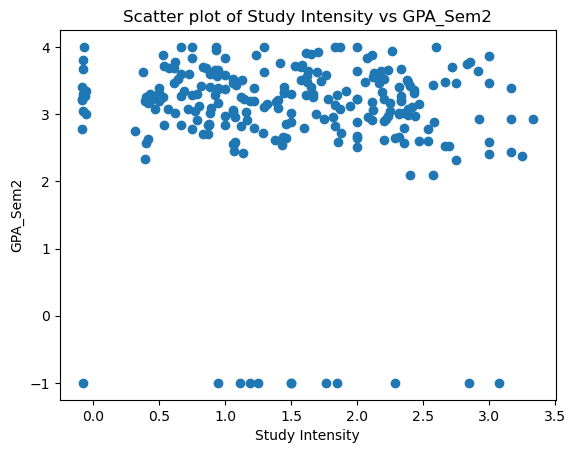

In [11]:
#2 Study habits. Pearson correlation between StudyIntensity and GPA_Sem2; Visualize with scatter and print out the Pearson correlation (in our notes).
import matplotlib.pyplot as plt
correlation = df['StudyIntensity'].corr(df['GPA_Sem2'])
print(correlation)
plt.scatter(df['StudyIntensity'], df['GPA_Sem2'])
plt.xlabel('Study Intensity')
plt.ylabel('GPA_Sem2')
plt.title('Scatter plot of Study Intensity vs GPA_Sem2')

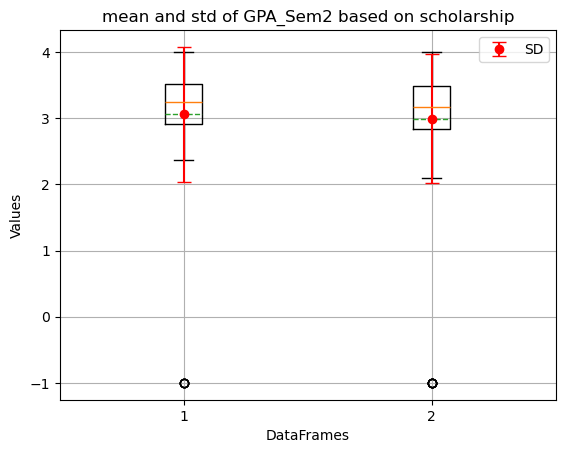

In [12]:
#3 Scholarships. Mean & SD of GPA_Sem2 for scholarship vs non‑scholarship. Visualize this with box plot.
scholarship = df[df['Scholarship'] == 'Yes']
non_scholarship = df[df['Scholarship'] == 'No']
scholarship_mean = scholarship['GPA_Sem2'].mean()
non_mean = non_scholarship['GPA_Sem2'].mean()
scholarship_std = scholarship['GPA_Sem2'].std()
non_std = non_scholarship['GPA_Sem2'].std()

plt.boxplot([scholarship['GPA_Sem2'], non_scholarship['GPA_Sem2']], showmeans=True, meanline=True)
plt.errorbar(1, scholarship_mean, yerr=scholarship_std, fmt='o', color='red', capsize=5, label='SD')
plt.errorbar(2, non_mean, yerr=non_std, fmt='o', color='red', capsize=5)

plt.xlabel('DataFrames')
plt.ylabel('Values')
plt.title('mean and std of GPA_Sem2 based on scholarship')
plt.legend()
plt.grid(True)
plt.show()


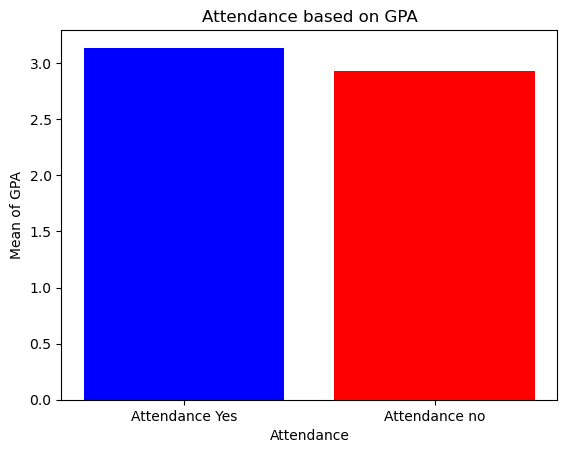

In [26]:
#4 Attendance. Compute the average GPA_Sem2 for AttendanceFlag = 1 vs 0. Visualize this with a bar chart.
import numpy as np
yes = df[df['AttendanceFlag'] == 1]
no = df[df['AttendanceFlag'] == 0]
mean_yes = yes['GPA_Sem2'].mean()
mean_no = no['GPA_Sem2'].mean()

categories = ['Attendance Yes', 'Attendance no']
means = [mean_yes, mean_no]

plt.bar(categories, means, color=['blue', 'red'])

plt.xlabel('Attendance')
plt.ylabel('Mean of GPA')
plt.title('Attendance based on GPA')
plt.show()

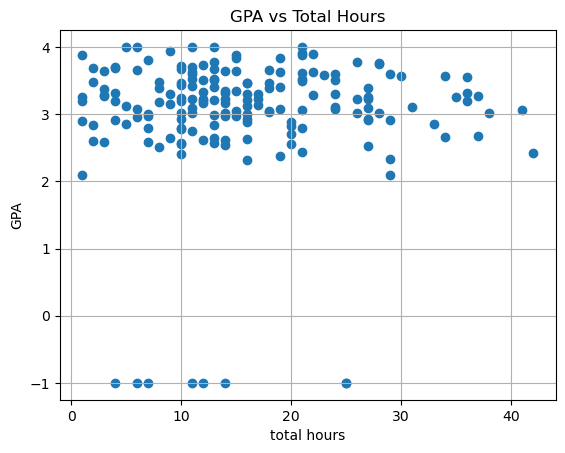

In [40]:
#5 Activity load. Compute total Activity_Hours; plot vs GPA_Sem2.
total_hours = df2.groupby('StudentID', as_index=False)['HoursPerWeek'].sum()
df_merged = pd.merge(total_hours, df, on='StudentID')

plt.scatter(df_merged['HoursPerWeek'], df_merged['GPA_Sem2'])
plt.xlabel('total hours')
plt.ylabel('GPA')
plt.title('GPA vs Total Hours')
plt.grid(True)
plt.show()


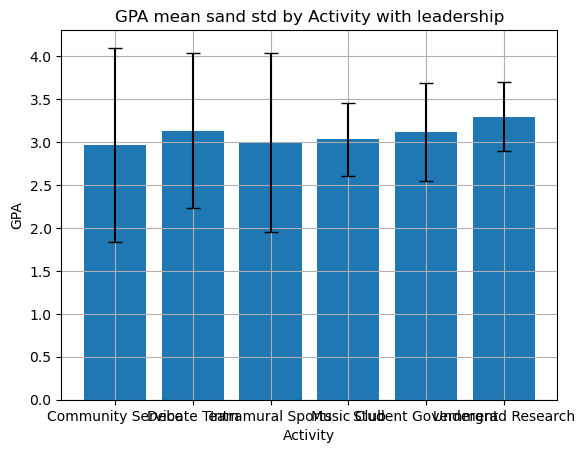

In [92]:
#6 Leadership. Does any leadership role correspond to higher GPA? Plot this with box plot (include average and std for each leadership role). You might have to groupby...
merged = pd.merge(df, df2, on='StudentID')
leadership = merged[merged['LeadershipRole'] == 'Yes']
mean_gpa = leadership.groupby('Activity')['GPA_Sem2'].mean()
std_gpa = leadership.groupby("Activity")['GPA_Sem2'].std()

valid_activities = std_gpa.dropna().index

mean_vals = mean_gpa.loc[valid_activities].tolist()
std_vals = std_gpa.loc[valid_activities].tolist()
activities = valid_activities.tolist()

plt.bar(activities, mean_vals, yerr=std_vals, capsize=5)
plt.xlabel('Activity')
plt.ylabel('GPA')
plt.title('GPA mean sand std by Activity with leadership')
plt.grid(True)
plt.show()



                   MeanGPA  MeanStudyIntensity  ScholarshipRate
Major                                                          
Biology           3.129825            1.442200        36.842105
Computer Science  2.890000            1.573255        47.191011
Economics         3.136000            1.439477        32.500000
English           3.148824            1.410766        23.529412
Psychology        3.004483            1.641165        52.873563


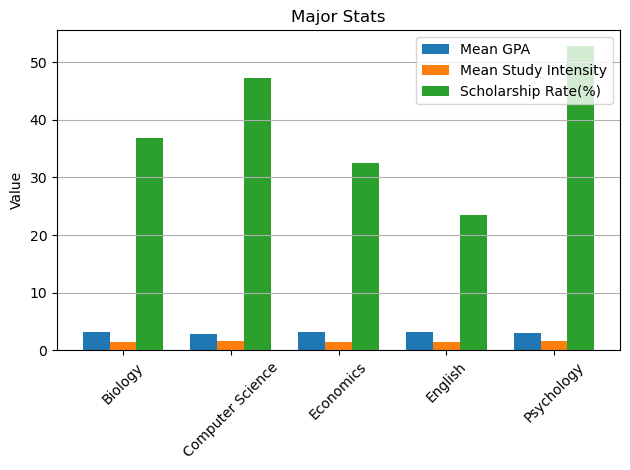

In [106]:
#7 Major comparison. For every major: mean GPA, mean study hours, scholarship %. Print out and Visualize with a grouped bar chart.
major_stats = merged.groupby('Major').agg(
    MeanGPA=('GPA_Sem2','mean'),
    MeanStudyIntensity=('StudyIntensity','mean'),
    ScholarshipRate=('Scholarship', lambda x: (x=='Yes').mean()*100))
print(major_stats)
labels = major_stats.index.tolist()
mean_gpa = major_stats['MeanGPA'].tolist()
mean_study = major_stats['MeanStudyIntensity'].tolist()
scholarship_rate = major_stats['ScholarshipRate'].tolist()

x = np.arange(len(labels))
width = 0.25

plt.bar(x - width, mean_gpa, width, label = 'Mean GPA')
plt.bar(x, mean_study, width, label='Mean Study Intensity')
plt.bar(x + width, scholarship_rate, width, label='Scholarship Rate(%)')

plt.xticks(x, labels, rotation = 45)
plt.ylabel('Value')
plt.title("Major Stats")
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

In [120]:
#8 Predictive index. Calculate the (z‑score) GPA (looking back at our class notes), attendance, study hours; Call this variable SuccessScore; list top 15.
GPA_mean = merged['GPA_Sem2'].to_numpy().mean()
GPA_std = merged['GPA_Sem2'].to_numpy().mean()
GPA = merged['GPA_Sem2'].to_numpy()
success = (GPA - GPA_mean) / GPA_std
merged['SuccessScore'] = success

print(merged.sort_values(by='SuccessScore', ascending=False).head(15))

     StudentID             Major  ClassYear  GPA_Sem1  GPA_Sem2  \
64        1049           Biology  Sophomore      3.95      4.00   
63        1049           Biology  Sophomore      3.95      4.00   
250       1182         Economics  Sophomore      3.69      4.00   
249       1182         Economics  Sophomore      3.69      4.00   
62        1049           Biology  Sophomore      3.95      4.00   
11        1013           English   Freshman     -1.00      4.00   
7         1010           English  Sophomore      3.64      4.00   
148       1108        Psychology   Freshman      3.49      4.00   
352       1238        Psychology  Sophomore      3.22      3.94   
351       1238        Psychology  Sophomore      3.22      3.94   
38        1034  Computer Science     Senior      3.16      3.91   
36        1034  Computer Science     Senior      3.16      3.91   
37        1034  Computer Science     Senior      3.16      3.91   
287       1203  Computer Science     Junior      2.47      3.8

---
## Part C — Communication *(15 pts)*

* Explain two actionable insights from your data
* Point to the data that seems to be the most powerful.
* The discussion here should be at least 200 words.
* Your explanation should be in markdown.  Modify the markdown cell below.  
 

## Change me
* Bullet points  **boldface**

We can determine that people who have better attendance often have higher gpa's based on the graph from problem 4. This helps us understand that going to class is important to learning and understanding the material, which usually leads to a higher GPA. We can also see that people with a leadership role in undergrad research have the highest gpa of the leaders in their respective activities, showing that people who continue to do research and think about their work even when not in class have deeper understanding of it and therefore often a higher gpa. This shows that doing research is a great way to keep your mind working outside of class, leading to a higher gpa on average. Another interesting point is that people with scholarships tend to have a higher gpa. This is most likely because many people who have scholarships often are more motivated to put in the work for a couple different reasons, like because they have less money and the opportunity feels bigger or they need to keep a certain GPA to keep their scholarship. The most powerful data in my opinion is the attendance rate graph, because it shows how important showing up for class is. It is a good way to show that attendance is important, which is something many professors stress all the time. 